In [56]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [57]:
mod_00164 = pd.read_csv("data/MOD-00164.csv")
mod_00166 = pd.read_csv("data/MOD-00166.csv")
mod_00170 = pd.read_csv("data/MOD-00170.csv")
mod_00174 = pd.read_csv("data/MOD-00174.csv")
mod_00181 = pd.read_csv("data/MOD-00181.csv")
mod_00182 = pd.read_csv("data/MOD-00182.csv")
mod_00337 = pd.read_csv("data/MOD-00337.csv")
mod_00343 = pd.read_csv("data/MOD-00343.csv")

In [58]:
#combine into singular dataframes for no2 and o3
dfs = {
    "MOD-00164": mod_00164,
    "MOD-00166": mod_00166,
    "MOD-00170": mod_00170,
    "MOD-00174": mod_00174,
    "MOD-00181": mod_00181,
    "MOD-00182": mod_00182,
    "MOD-00337": mod_00337,
    "MOD-00343": mod_00343,
}

for k, df in dfs.items():
    df["period_start_utc"] = pd.to_datetime(df["period_start_utc"])
    dfs[k] = df.set_index("period_start_utc")

no2_df = pd.concat(
    {sensor: df["no2"] for sensor, df in dfs.items()},
    axis=1
)

no2_df.head()
# no2_df.to_csv("data/delmelater.csv")

,MOD-00164,MOD-00166,MOD-00170,MOD-00174,MOD-00181,MOD-00182,MOD-00337,MOD-00343
period_start_utc,,,,,,,,
2024-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
o3_df = pd.concat(
    {sensor: df["o3"] for sensor, df in dfs.items()},
    axis=1
)

o3_df.head()
# o3_df.to_csv("data/delmelater2.csv")

,MOD-00164,MOD-00166,MOD-00170,MOD-00174,MOD-00181,MOD-00182,MOD-00337,MOD-00343
period_start_utc,,,,,,,,
2024-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
pm25_df = pd.concat(
    {sensor: df["pm25"] for sensor, df in dfs.items()},
    axis=1
)

pm25_df.head()


pm1_df = pd.concat(
    {sensor: df["pm1"] for sensor, df in dfs.items()},
    axis=1
)

pm1_df.head()

pm10_df = pd.concat(
    {sensor: df["pm10"] for sensor, df in dfs.items()},
    axis=1
)

pm10_df.head()

,MOD-00164,MOD-00166,MOD-00170,MOD-00174,MOD-00181,MOD-00182,MOD-00337,MOD-00343
period_start_utc,,,,,,,,
2024-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
no2_df["MOD-00170"].describe()

count    292.000000
mean      21.308836
std       10.802121
min        3.632000
25%       11.816750
50%       21.058500
75%       30.754000
max       44.489000
Name: MOD-00170, dtype: float64

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3787528895.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


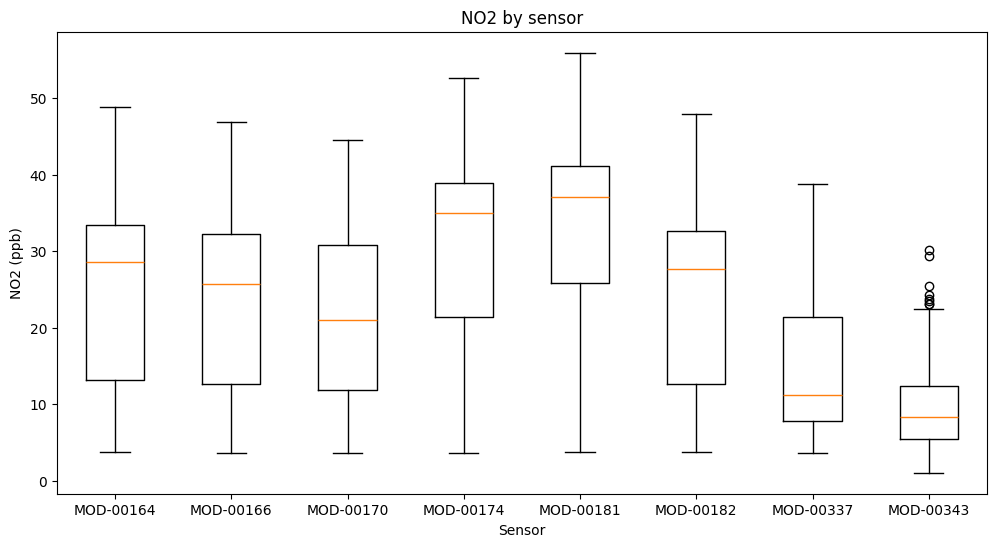

In [62]:
no2_clean = no2_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [no2_clean[col].dropna() for col in no2_clean.columns],
    labels=no2_clean.columns,
    showfliers=True
)

plt.ylabel("NO2 (ppb)")
plt.xlabel("Sensor")
plt.title("NO2 by sensor")
plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/2569359695.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


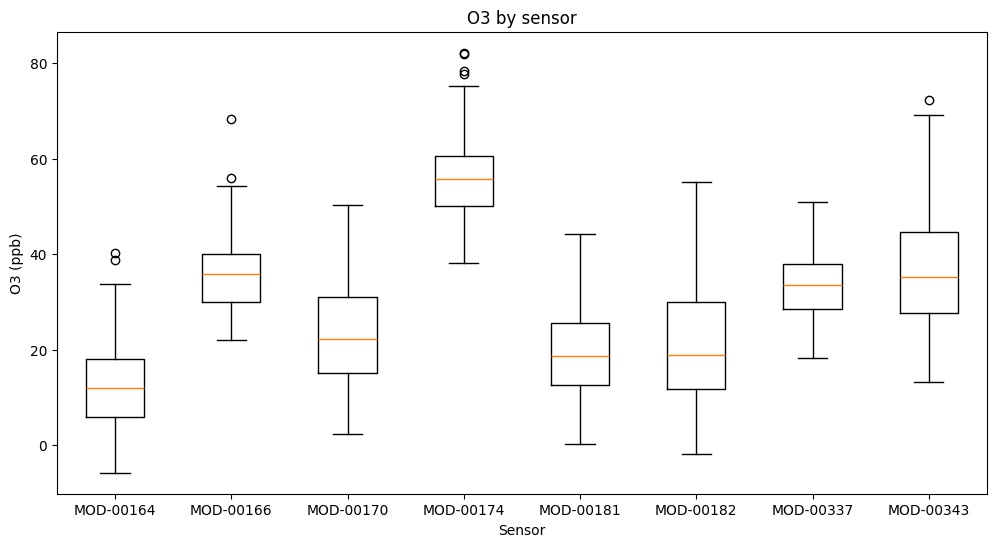

In [63]:
o3_clean = o3_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [o3_clean[col].dropna() for col in o3_clean.columns],
    labels=o3_clean.columns,
    showfliers=True
)

plt.ylabel("O3 (ppb)")
plt.xlabel("Sensor")
plt.title("O3 by sensor")
plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3264924443.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


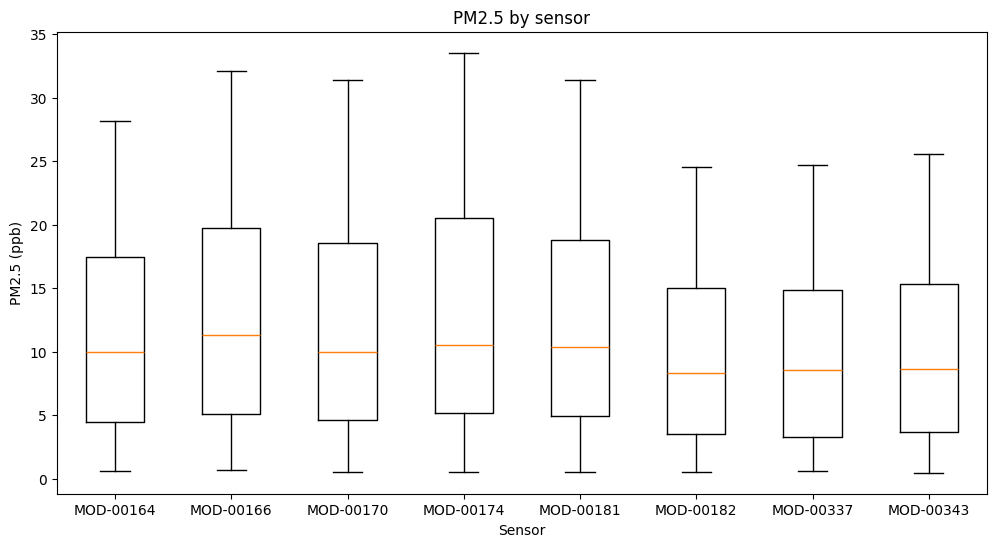

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3264924443.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


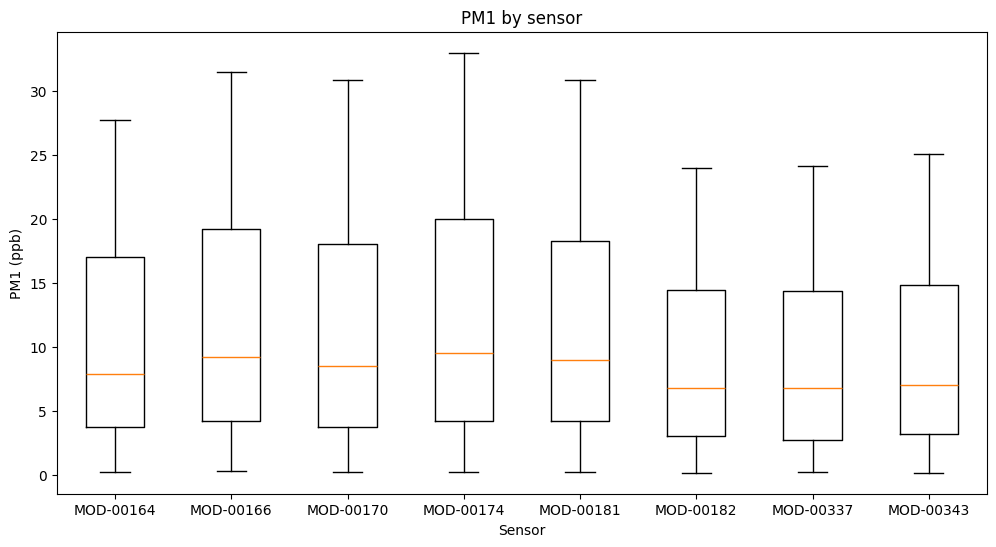

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3264924443.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


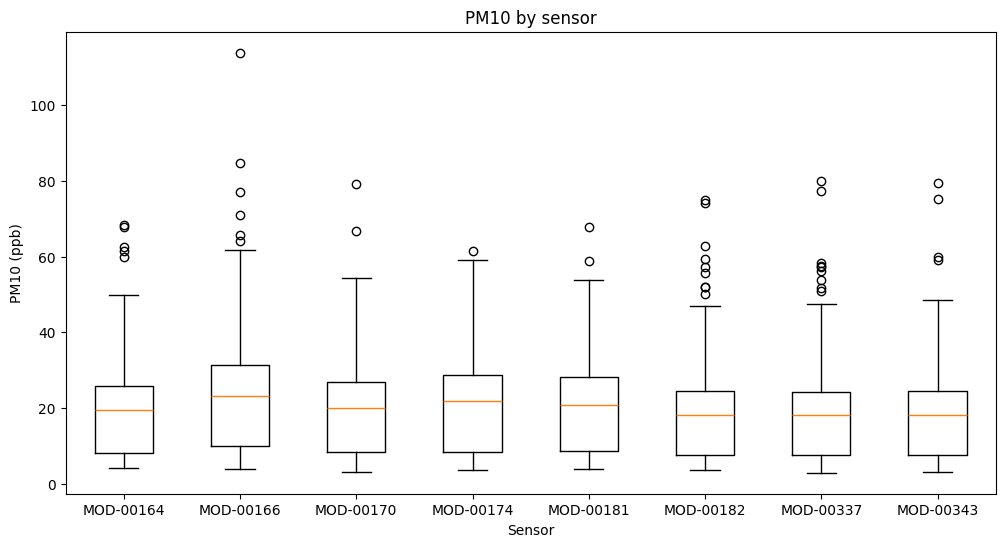

In [64]:
pm25_clean = pm25_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [pm25_clean[col].dropna() for col in pm25_clean.columns],
    labels=pm25_clean.columns,
    showfliers=True
)

plt.ylabel("PM2.5 (ppb)")
plt.xlabel("Sensor")
plt.title("PM2.5 by sensor")
plt.show()

pm1_clean = pm1_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [pm1_clean[col].dropna() for col in pm1_clean.columns],
    labels=pm1_clean.columns,
    showfliers=True
)

plt.ylabel("PM1 (ppb)")
plt.xlabel("Sensor")
plt.title("PM1 by sensor")
plt.show()

pm10_clean = pm10_df.dropna(how="all")

plt.figure(figsize=(12, 6))
plt.boxplot(
    [pm10_clean[col].dropna() for col in pm10_clean.columns],
    labels=pm10_clean.columns,
    showfliers=True
)

plt.ylabel("PM10 (ppb)")
plt.xlabel("Sensor")
plt.title("PM10 by sensor")
plt.show()

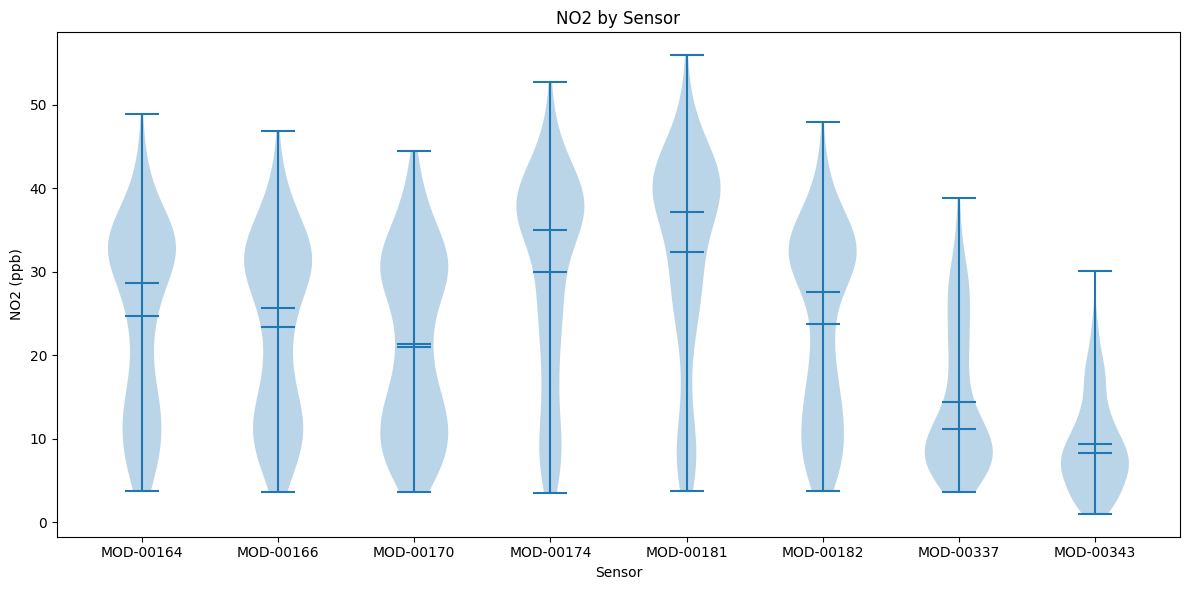

In [65]:
plt.figure(figsize=(12, 6))
plt.violinplot(
    [no2_clean[col].dropna() for col in no2_clean.columns],
    showmeans=True,
    showmedians=True
)

plt.xticks(
    range(1, len(no2_clean.columns) + 1),
    no2_clean.columns,
)

plt.ylabel("NO2 (ppb)")
plt.xlabel("Sensor")
plt.title("NO2 by Sensor")
plt.tight_layout()
plt.show()


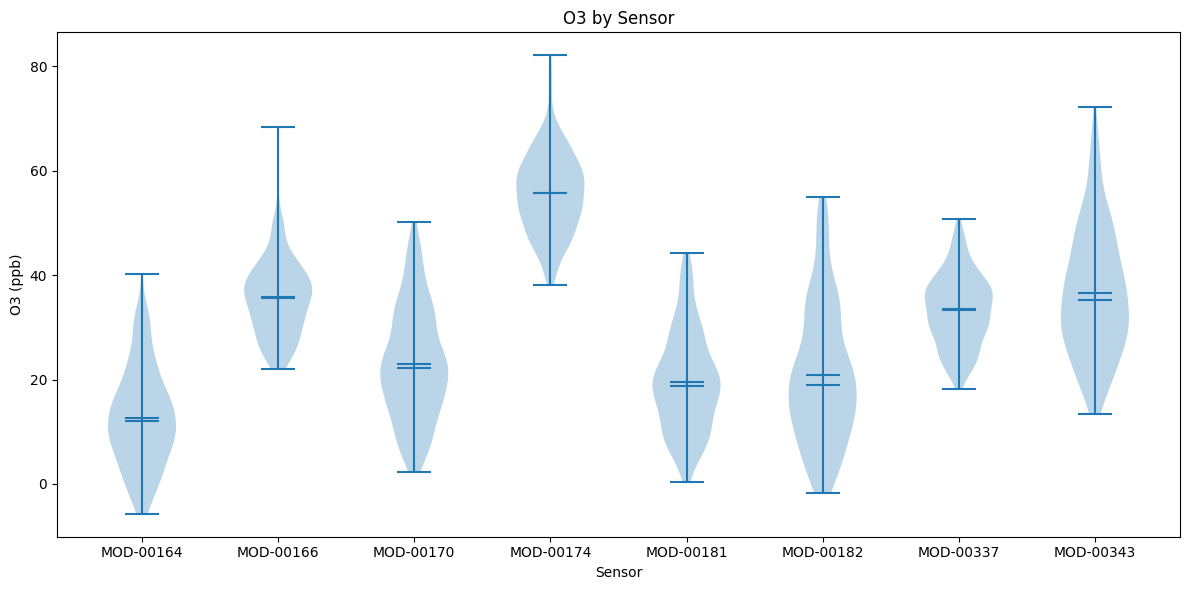

In [66]:
plt.figure(figsize=(12, 6))
plt.violinplot(
    [o3_clean[col].dropna() for col in o3_clean.columns],
    showmeans=True,
    showmedians=True
)

plt.xticks(
    range(1, len(o3_clean.columns) + 1),
    o3_clean.columns,
)

plt.ylabel("O3 (ppb)")
plt.xlabel("Sensor")
plt.title("O3 by Sensor")
plt.tight_layout()
plt.show()

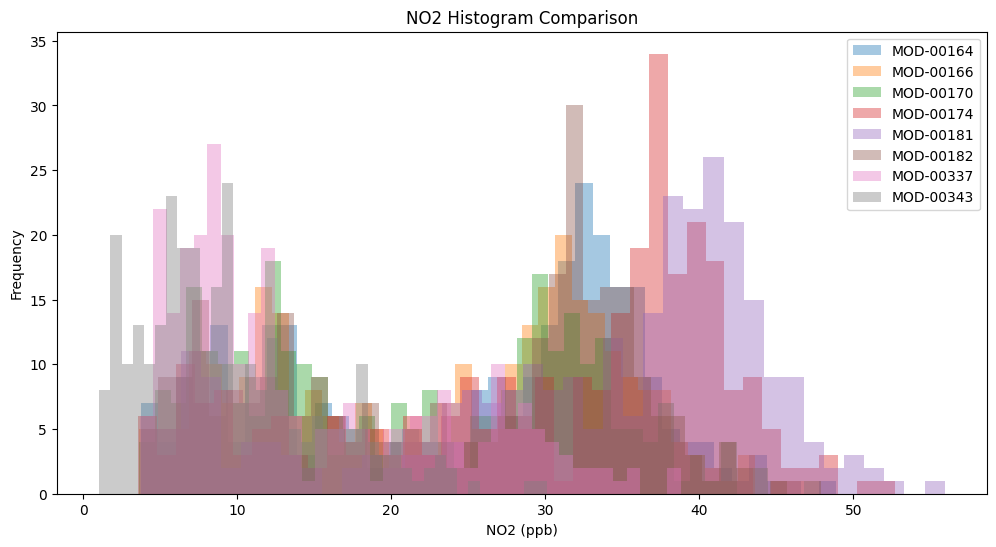

In [67]:
plt.figure(figsize=(12, 6))

for col in no2_clean.columns:
    plt.hist(
        no2_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("NO2 (ppb)")
plt.ylabel("Frequency")
plt.title("NO2 Histogram Comparison")
plt.legend()
plt.show()


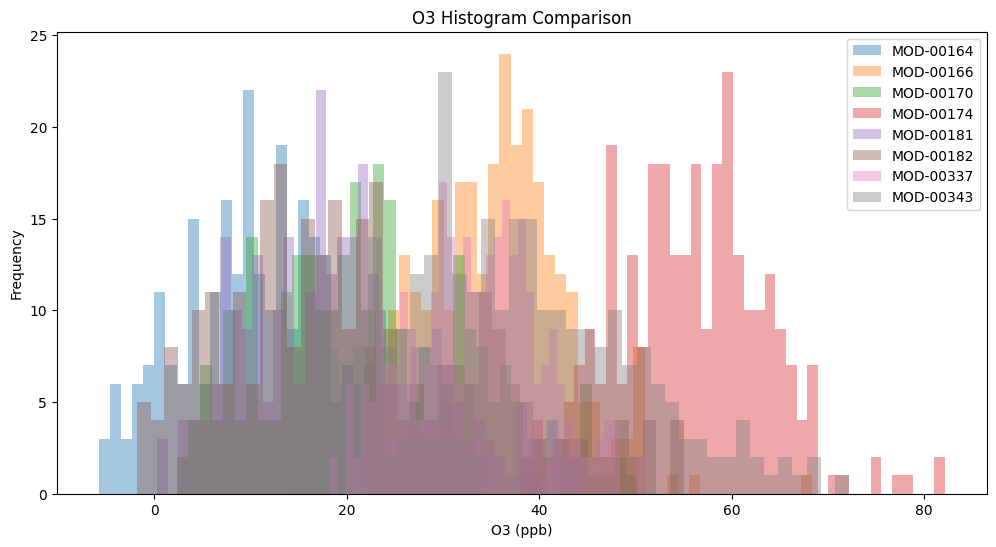

In [68]:
plt.figure(figsize=(12, 6))

for col in o3_clean.columns:
    plt.hist(
        o3_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("O3 (ppb)")
plt.ylabel("Frequency")
plt.title("O3 Histogram Comparison")
plt.legend()
plt.show()


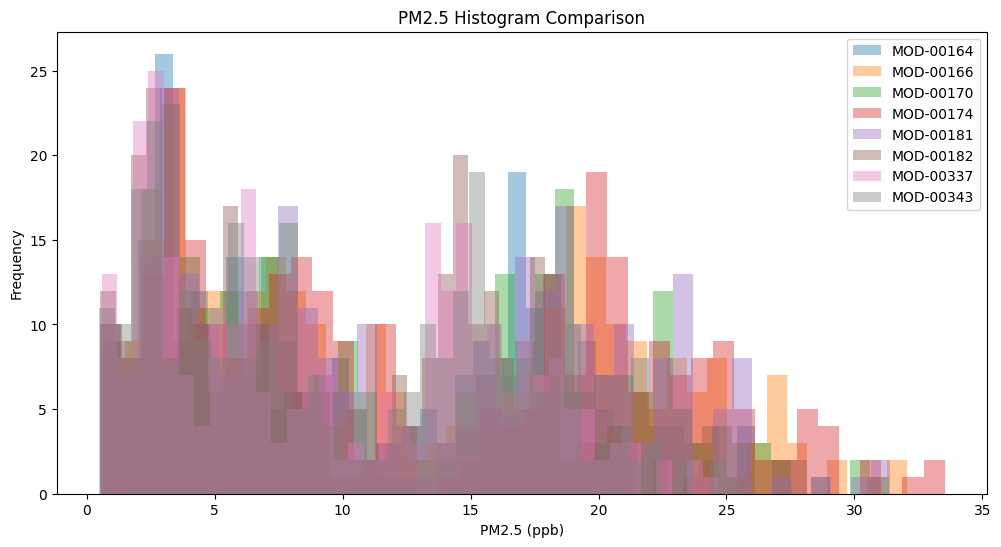

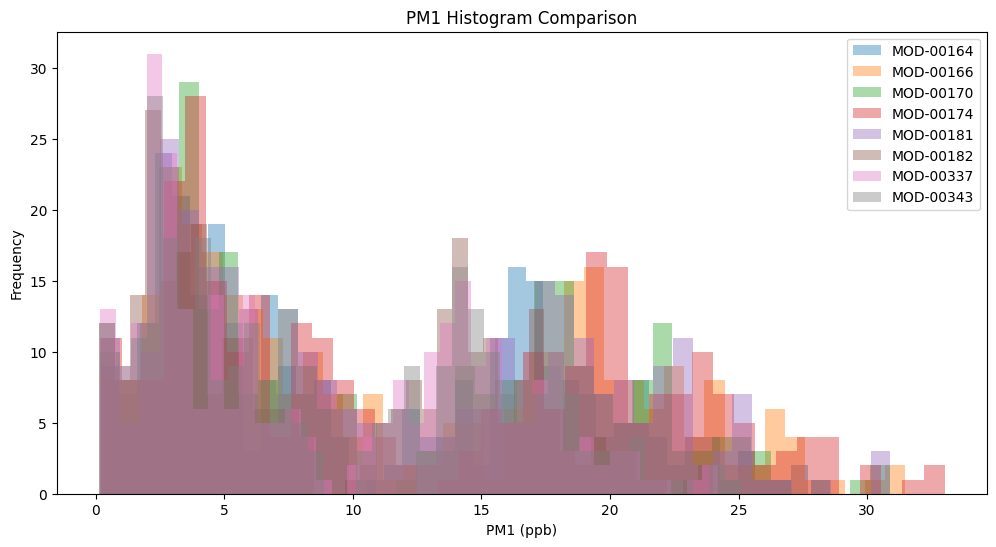

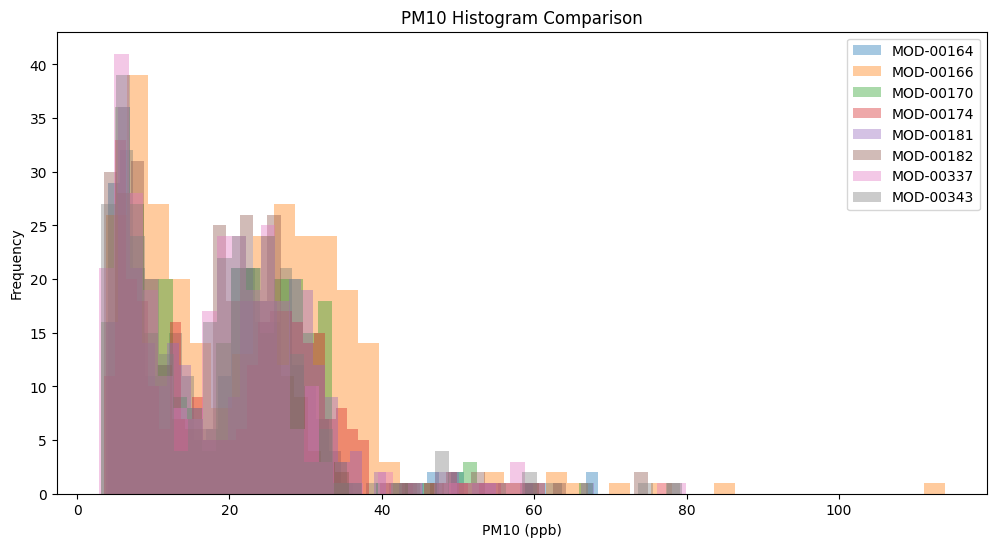

In [69]:
plt.figure(figsize=(12, 6))

for col in pm25_clean.columns:
    plt.hist(
        pm25_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("PM2.5 (ppb)")
plt.ylabel("Frequency")
plt.title("PM2.5 Histogram Comparison")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))

for col in pm1_clean.columns:
    plt.hist(
        pm1_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("PM1 (ppb)")
plt.ylabel("Frequency")
plt.title("PM1 Histogram Comparison")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))

for col in pm10_clean.columns:
    plt.hist(
        pm10_clean[col].dropna(),
        bins=40,
        alpha=0.4,
        label=col
    )

plt.xlabel("PM10 (ppb)")
plt.ylabel("Frequency")
plt.title("PM10 Histogram Comparison")
plt.legend()
plt.show()

In [70]:
#function for calculating RSD

def compute_rsd(df, sensors=None):
    if sensors is not None:
        df = df[sensors]

    mean = df.mean(axis=1, skipna=True)
    std = df.std(axis=1, skipna=True)

    rsd = (std / mean) * 100

    return rsd

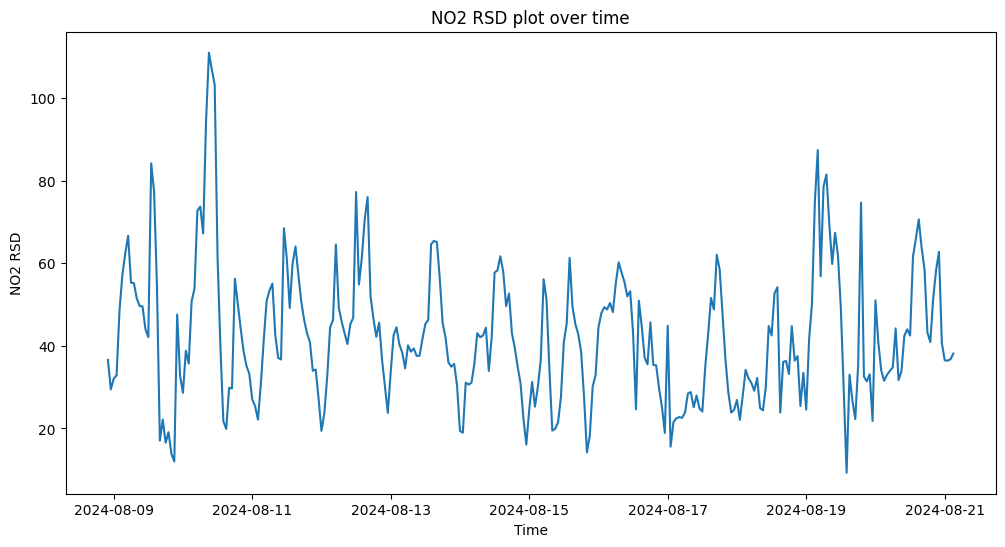

In [71]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_no2 = compute_rsd(
    no2_df,
    sensors=selected_sensors,
)

rsd_no2_clean = rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_no2_clean.index, rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3300706896.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


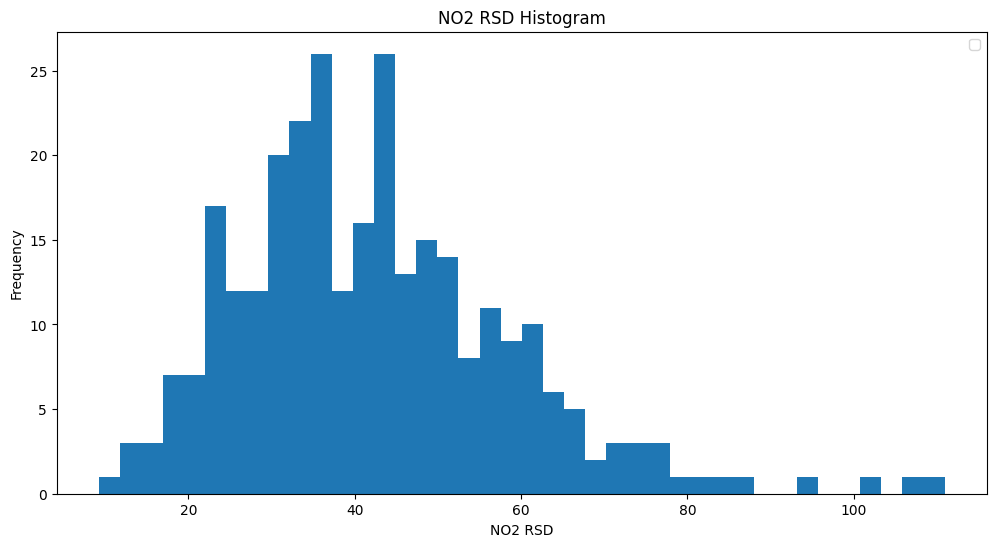

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3300706896.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


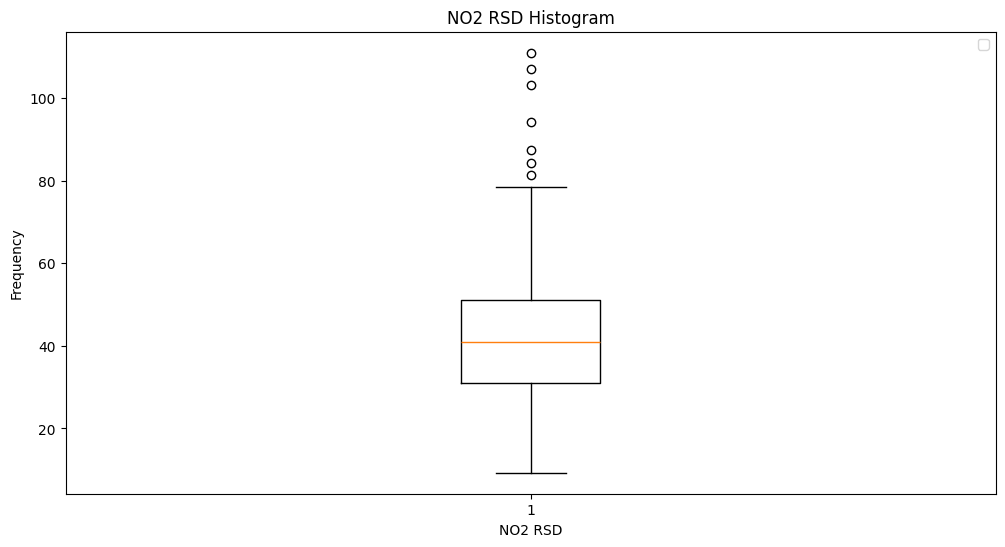

In [72]:
plt.figure(figsize=(12, 6))
plt.hist(rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram")
plt.legend()
plt.show()

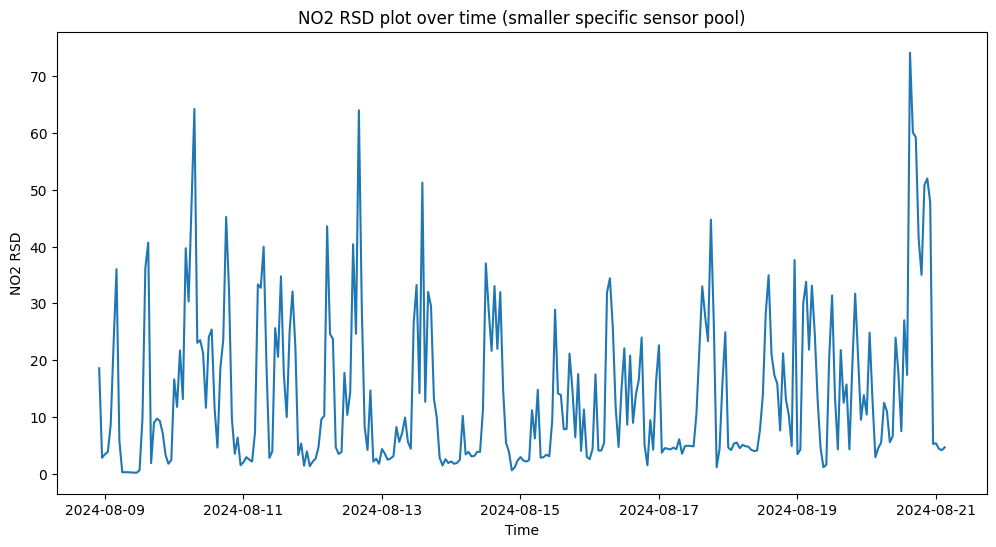

In [73]:
new_selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00182"
]

new_rsd_no2 = compute_rsd(
    no2_df,
    sensors=new_selected_sensors,
)

new_rsd_no2_clean = new_rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(new_rsd_no2_clean.index, new_rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time (smaller specific sensor pool)")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/4126251278.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


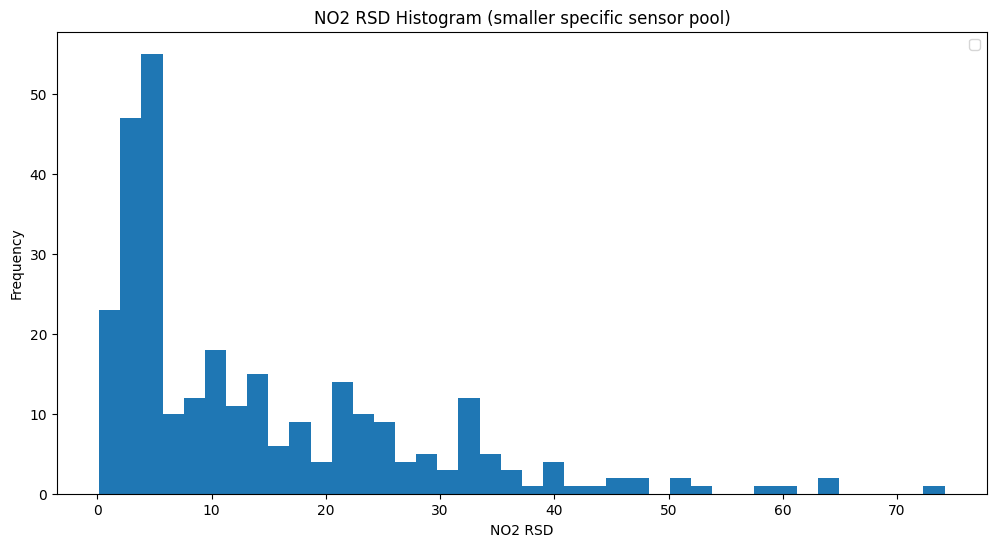

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/4126251278.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


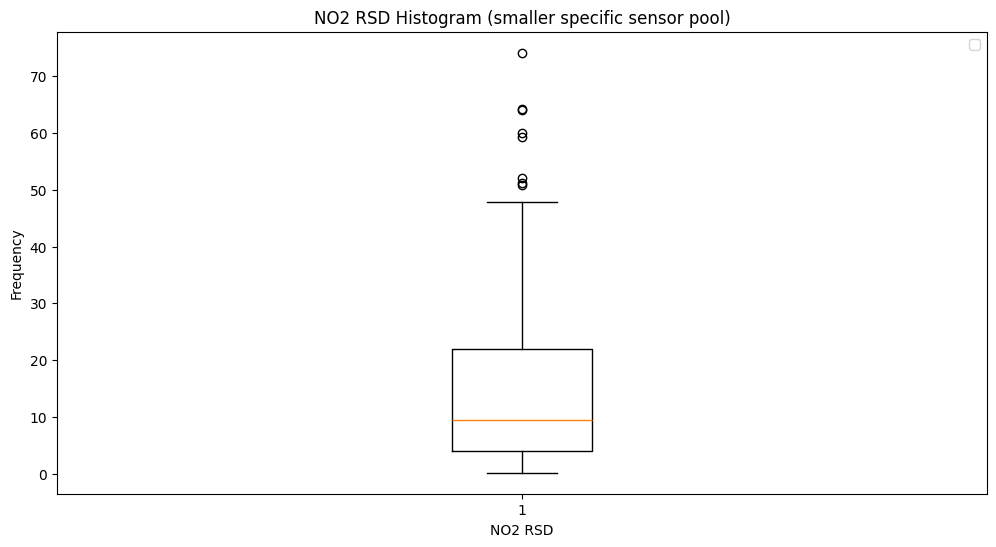

In [74]:
plt.figure(figsize=(12, 6))
plt.hist(new_rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (smaller specific sensor pool)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(new_rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (smaller specific sensor pool)")
plt.legend()
plt.show()

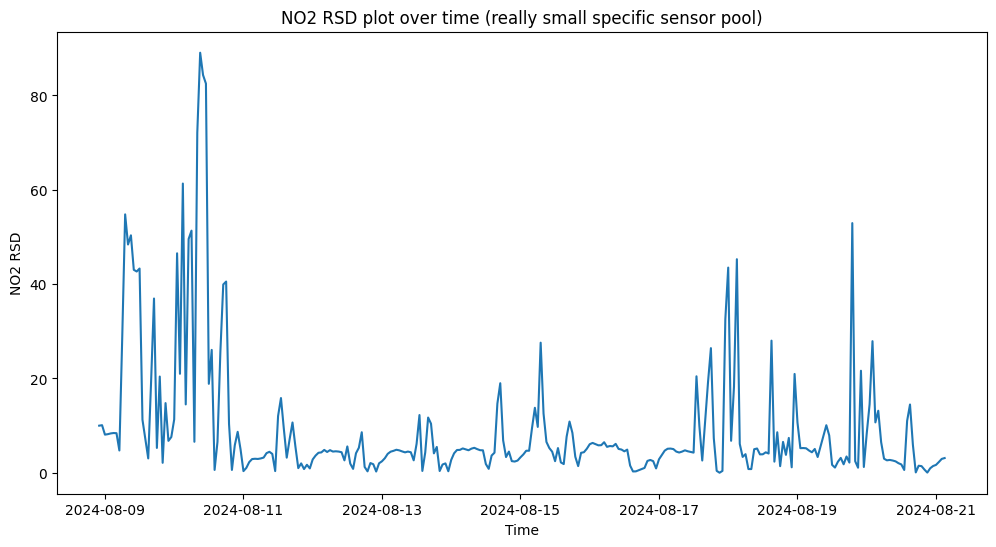

In [75]:
small_selected_sensors = [
    "MOD-00174",
    "MOD-00181",
]

smallpool_rsd_no2 = compute_rsd(
    no2_df,
    sensors=small_selected_sensors,
)

smallpool_rsd_no2_clean = smallpool_rsd_no2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(smallpool_rsd_no2_clean.index, smallpool_rsd_no2_clean.values)
plt.ylabel("NO2 RSD")
plt.xlabel("Time")
plt.title("NO2 RSD plot over time (really small specific sensor pool)")
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/1449122964.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


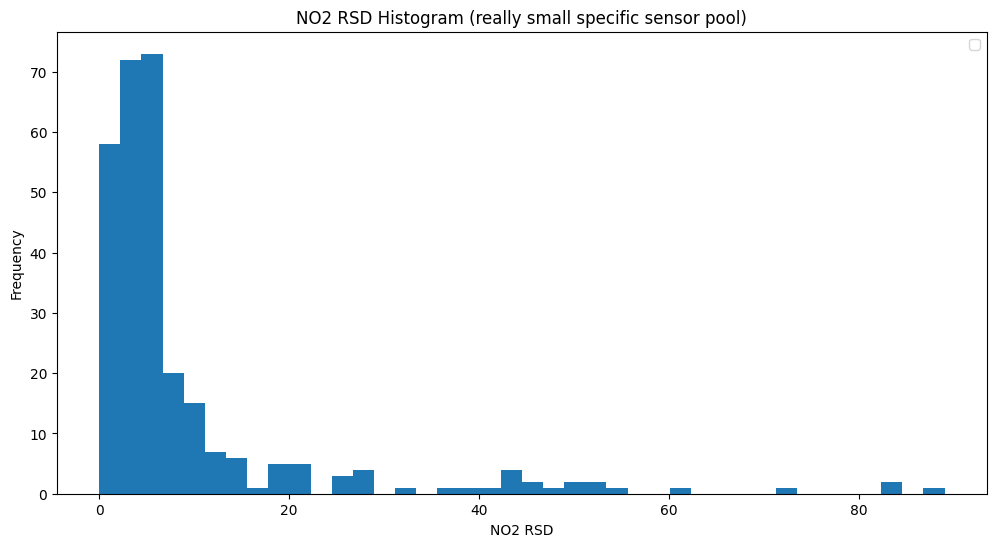

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/1449122964.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


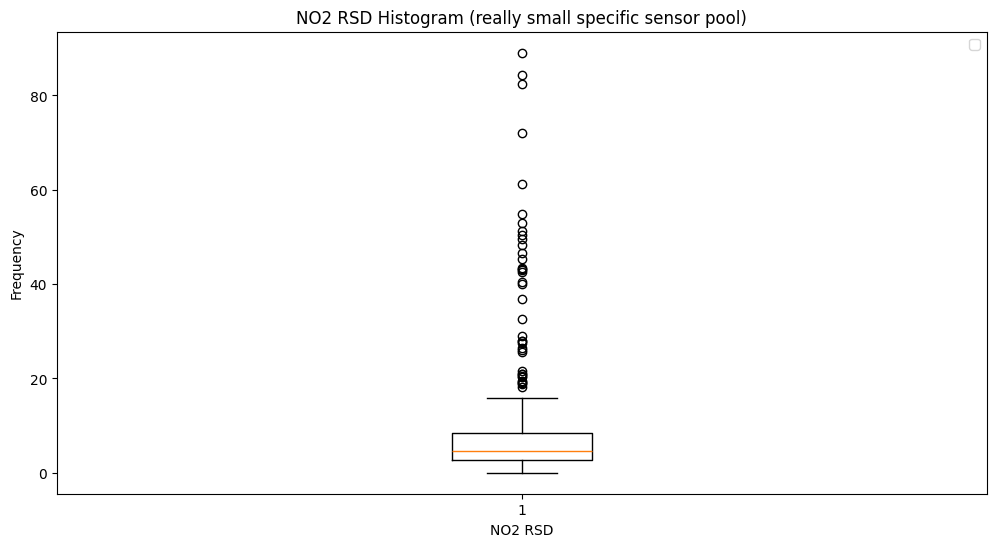

In [76]:
plt.figure(figsize=(12, 6))
plt.hist(smallpool_rsd_no2_clean, bins=40)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (really small specific sensor pool)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(smallpool_rsd_no2_clean)
plt.xlabel("NO2 RSD")
plt.ylabel("Frequency")
plt.title("NO2 RSD Histogram (really small specific sensor pool)")
plt.legend()
plt.show()

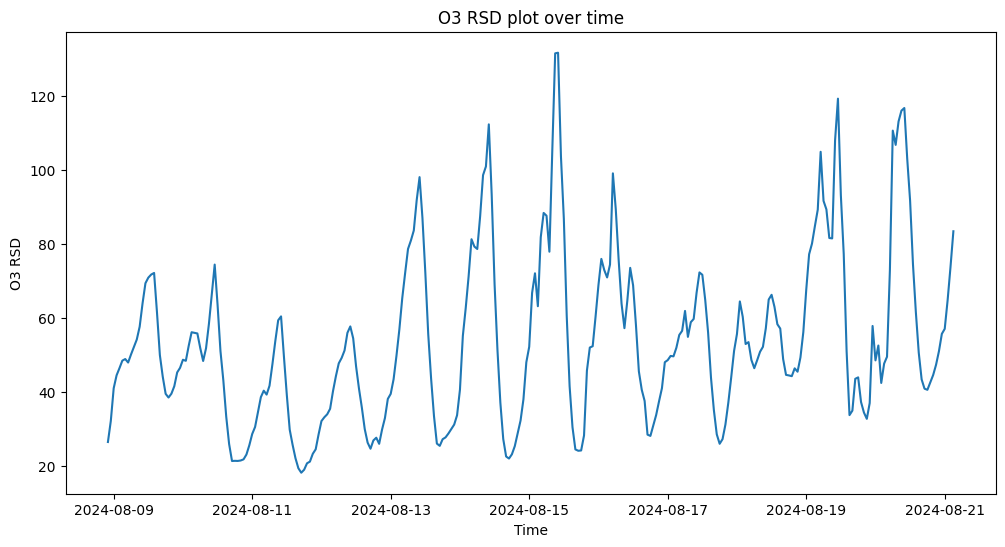

In [77]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_o3 = compute_rsd(
    o3_df,
    sensors=selected_sensors,
)

rsd_o3_clean = rsd_o3.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_o3_clean.index, rsd_o3_clean.values)
plt.ylabel("O3 RSD")
plt.xlabel("Time")
plt.title("O3 RSD plot over time")
plt.show()

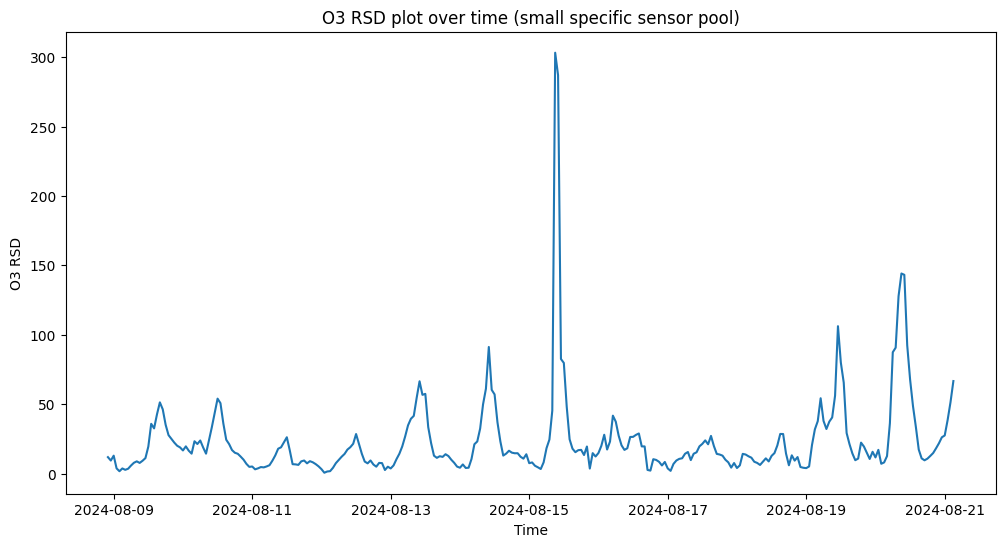

In [78]:
small_selected_sensors = [
    "MOD-00170",
    "MOD-00181",
    "MOD-00182",
]

small_rsd_o3 = compute_rsd(
    o3_df,
    sensors=small_selected_sensors,
)

small_rsd_o3_clean = small_rsd_o3.dropna()

plt.figure(figsize=(12, 6))
plt.plot(small_rsd_o3_clean.index, small_rsd_o3_clean.values)
plt.ylabel("O3 RSD")
plt.xlabel("Time")
plt.title("O3 RSD plot over time (small specific sensor pool)")
plt.show()

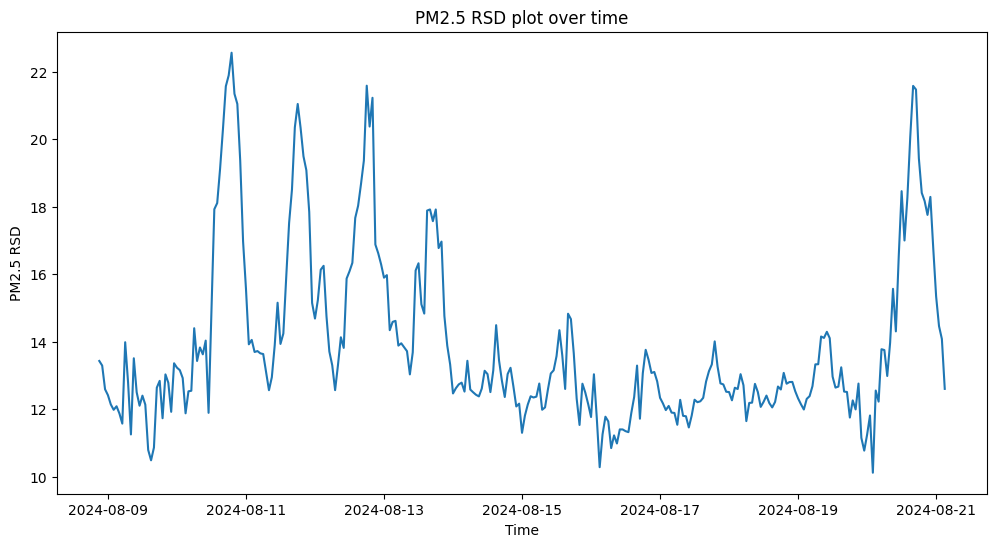

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3999048239.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


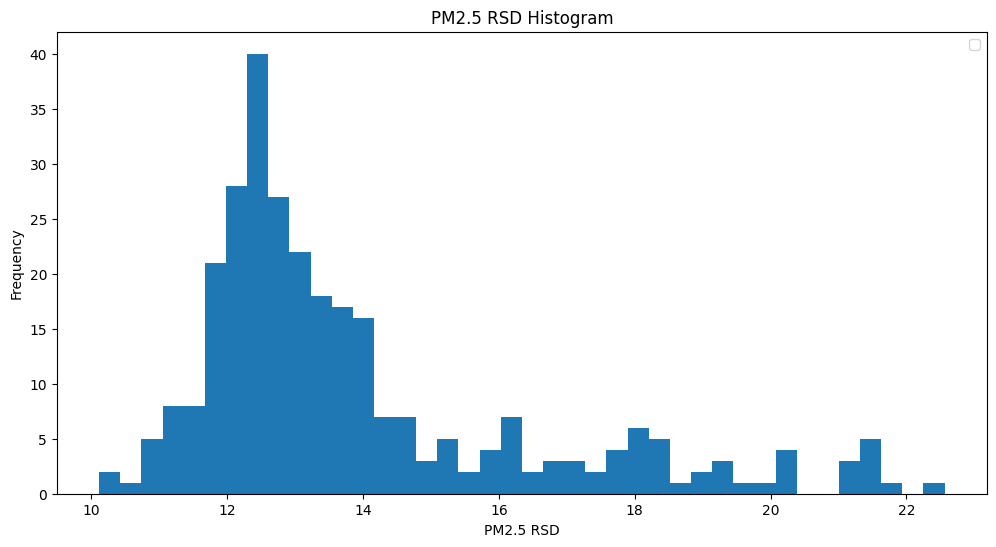

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3999048239.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


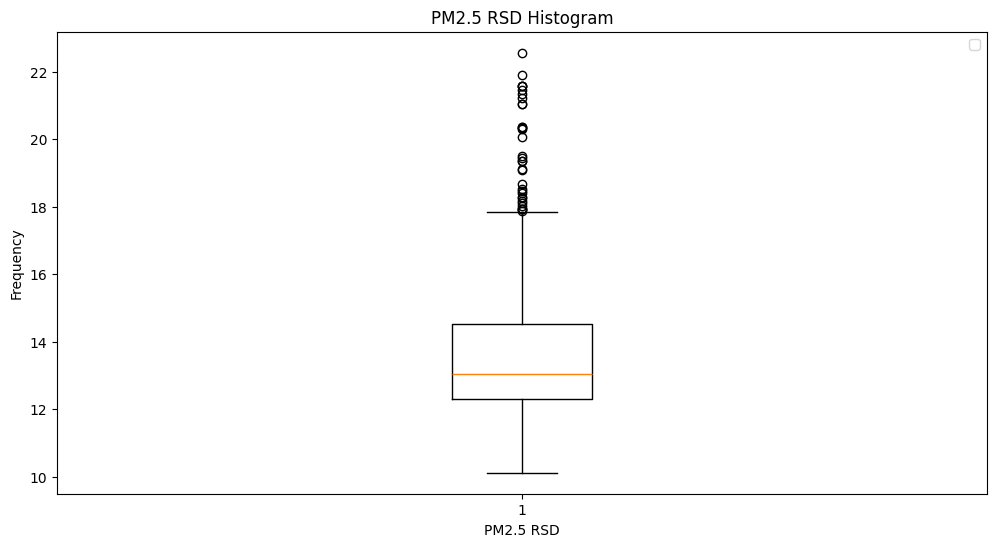

In [79]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_pm25 = compute_rsd(
    pm25_df,
    sensors=selected_sensors,
)

rsd_pm25_clean = rsd_pm25.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_pm25_clean.index, rsd_pm25_clean.values)
plt.ylabel("PM2.5 RSD")
plt.xlabel("Time")
plt.title("PM2.5 RSD plot over time")
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(rsd_pm25_clean, bins=40)
plt.xlabel("PM2.5 RSD")
plt.ylabel("Frequency")
plt.title("PM2.5 RSD Histogram")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(rsd_pm25_clean)
plt.xlabel("PM2.5 RSD")
plt.ylabel("Frequency")
plt.title("PM2.5 RSD Histogram")
plt.legend()
plt.show()

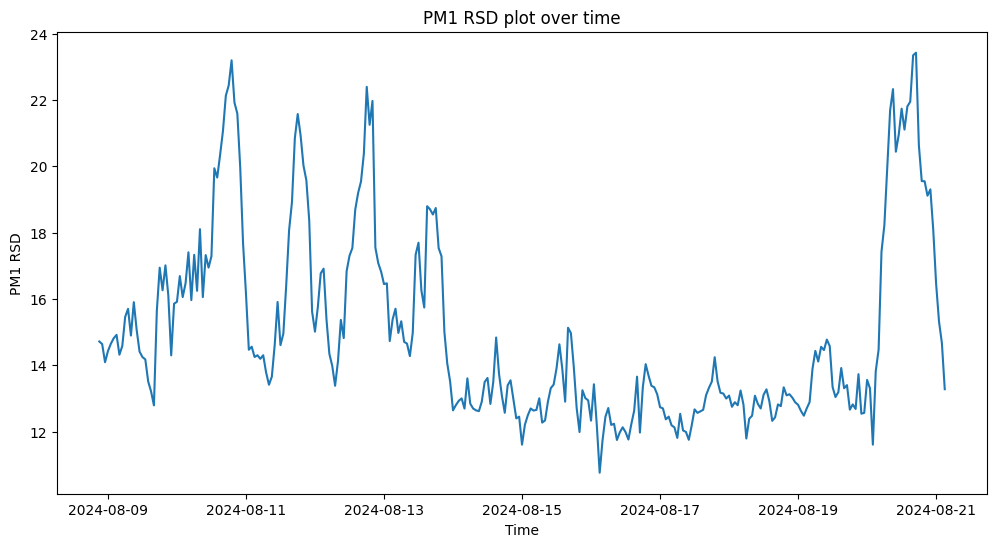

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/1451725513.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


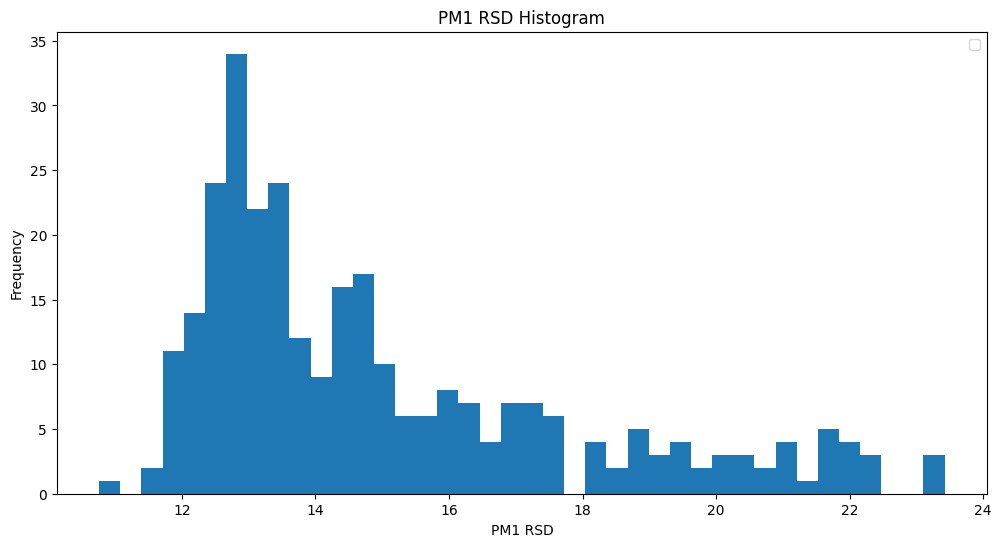

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/1451725513.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


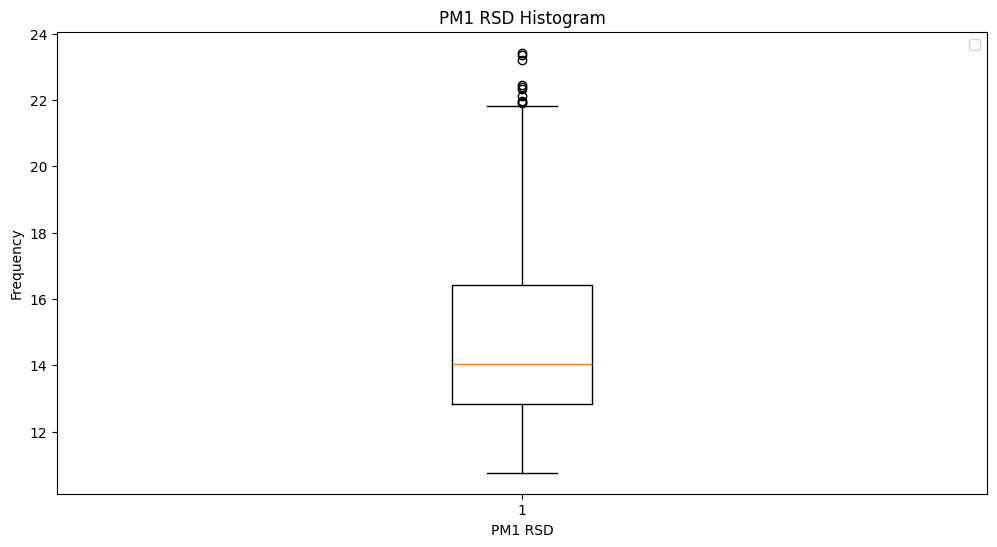

In [80]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_pm1 = compute_rsd(
    pm1_df,
    sensors=selected_sensors,
)

rsd_pm1_clean = rsd_pm1.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_pm1_clean.index, rsd_pm1_clean.values)
plt.ylabel("PM1 RSD")
plt.xlabel("Time")
plt.title("PM1 RSD plot over time")
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(rsd_pm1_clean, bins=40)
plt.xlabel("PM1 RSD")
plt.ylabel("Frequency")
plt.title("PM1 RSD Histogram")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(rsd_pm1_clean)
plt.xlabel("PM1 RSD")
plt.ylabel("Frequency")
plt.title("PM1 RSD Histogram")
plt.legend()
plt.show()

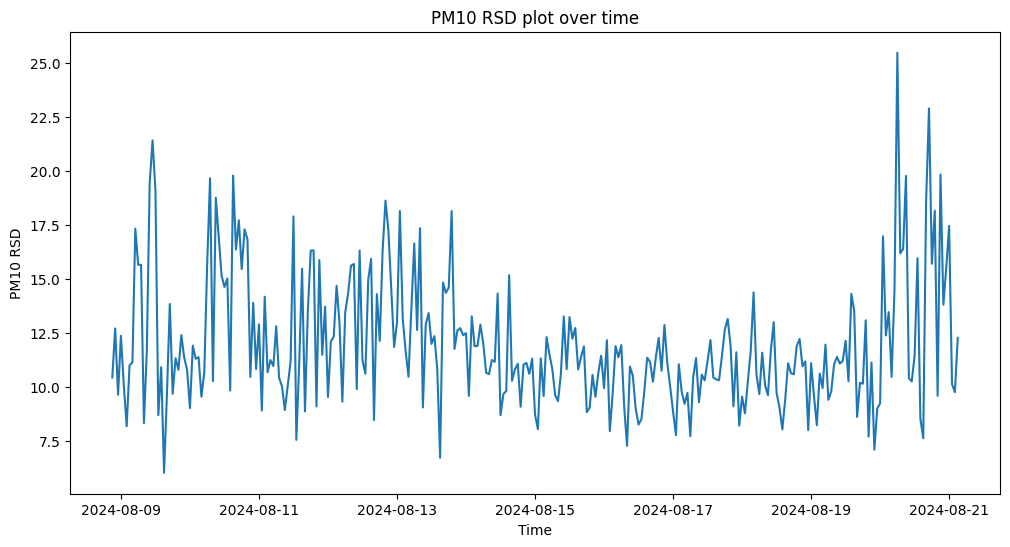

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/384660847.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


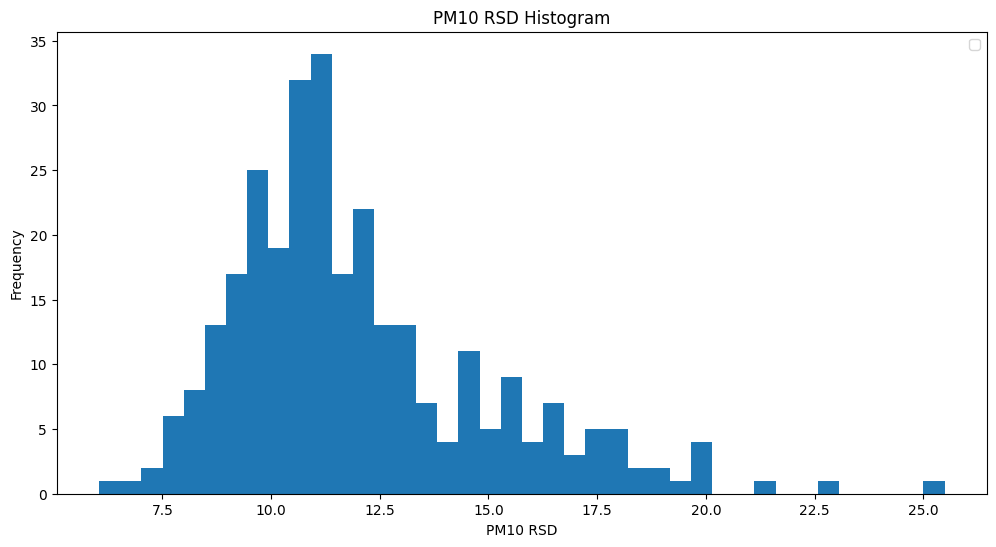

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/384660847.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


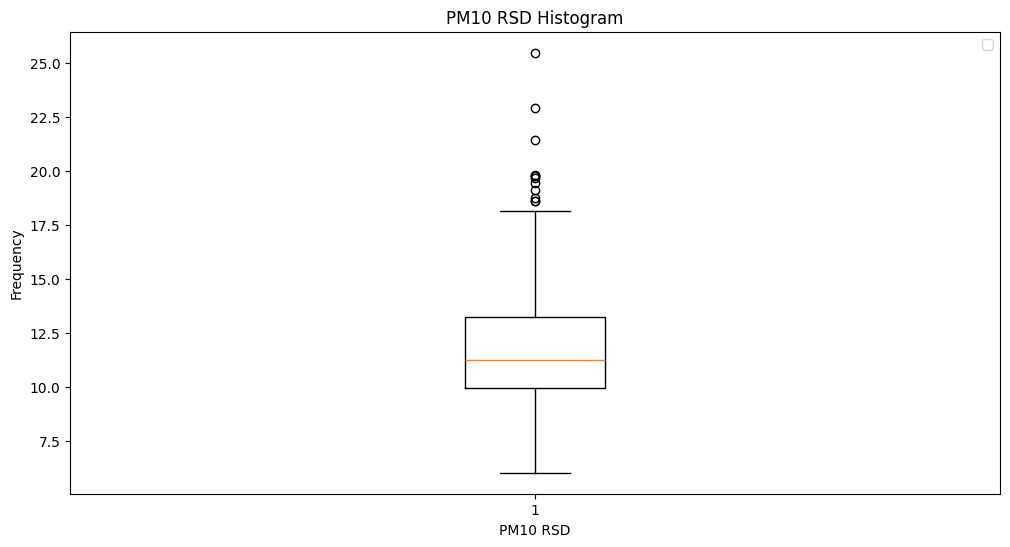

In [81]:
selected_sensors = [
    "MOD-00164",
    "MOD-00166",
    "MOD-00170",
    "MOD-00174",
    "MOD-00181",
    "MOD-00182",
    "MOD-00337",
    "MOD-00343",
]

rsd_pm10 = compute_rsd(
    pm10_df,
    sensors=selected_sensors,
)

rsd_pm10_clean = rsd_pm10.dropna()

plt.figure(figsize=(12, 6))
plt.plot(rsd_pm10_clean.index, rsd_pm10_clean.values)
plt.ylabel("PM10 RSD")
plt.xlabel("Time")
plt.title("PM10 RSD plot over time")
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(rsd_pm10_clean, bins=40)
plt.xlabel("PM10 RSD")
plt.ylabel("Frequency")
plt.title("PM10 RSD Histogram")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot(rsd_pm10_clean)
plt.xlabel("PM10 RSD")
plt.ylabel("Frequency")
plt.title("PM10 RSD Histogram")
plt.legend()
plt.show()

In [82]:
pm25_rsd = compute_rsd(pm25_df)
pm25_rsd = pm25_rsd.dropna()

threshold = pm25_rsd.quantile(0.10)
well_mixed_times = pm25_rsd[pm25_rsd <= threshold].index


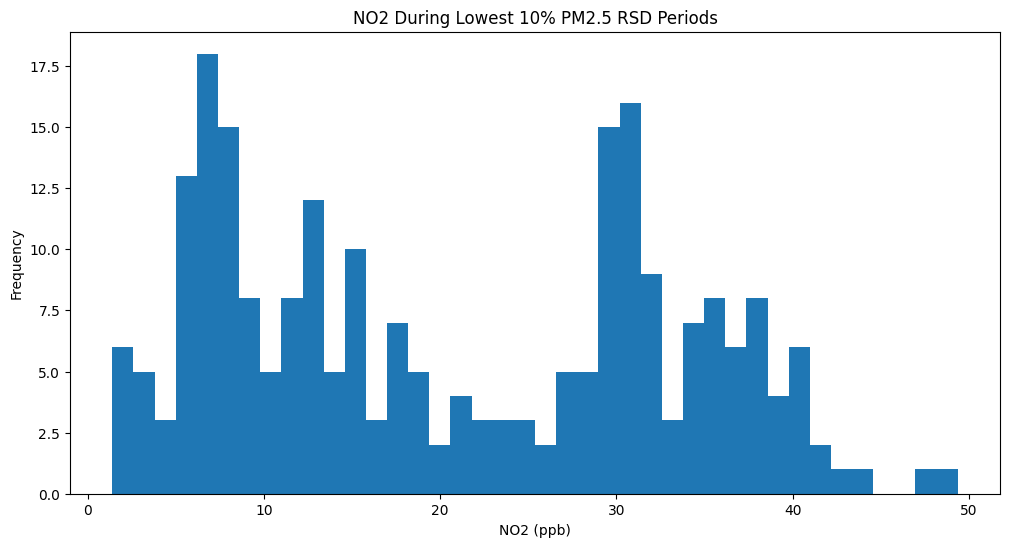

,MOD-00164,MOD-00166,MOD-00170,MOD-00174,MOD-00181,MOD-00182,MOD-00337,MOD-00343
period_start_utc,,,,,,,,
2024-08-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
no2_well_mixed = no2_df.loc[well_mixed_times]
no2_values = no2_well_mixed.stack().dropna()

plt.figure(figsize=(12, 6))
plt.hist(no2_values, bins=40)

plt.xlabel("NO2 (ppb)")
plt.ylabel("Frequency")
plt.title("NO2 During Lowest 10% PM2.5 RSD Periods")

plt.show()

no2_df.head()


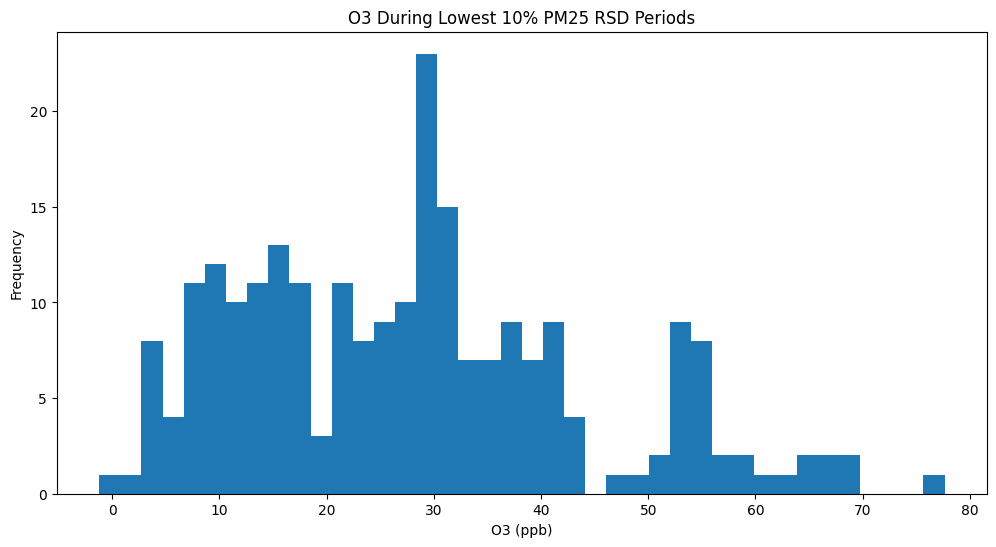

In [84]:
o3_well_mixed = o3_df.loc[well_mixed_times]
o3_values = o3_well_mixed.stack().dropna()

plt.figure(figsize=(12, 6))
plt.hist(o3_values, bins=40)

plt.xlabel("O3 (ppb)")
plt.ylabel("Frequency")
plt.title("O3 During Lowest 10% PM25 RSD Periods")

plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/3322452562.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


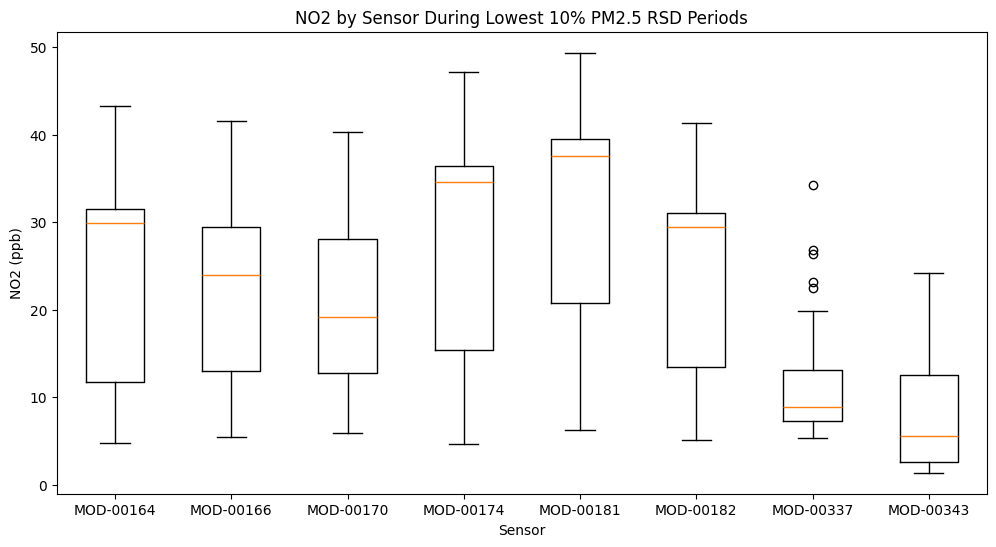

In [85]:
plt.figure(figsize=(12, 6))

data = [
    no2_well_mixed[sensor].dropna()
    for sensor in no2_well_mixed.columns
]

plt.boxplot(
    data,
    labels=no2_well_mixed.columns,
    showfliers=True
)

plt.xlabel("Sensor")
plt.ylabel("NO2 (ppb)")
plt.title("NO2 by Sensor During Lowest 10% PM2.5 RSD Periods")

plt.show()


In [86]:
no2_rsd = compute_rsd(no2_df)
no2_rsd = no2_rsd.dropna()

threshold_no2 = no2_rsd.quantile(0.10)
well_mixed_times_no2 = no2_rsd[no2_rsd <= threshold].index

pm25_well_mixed = pm25_df.loc[well_mixed_times]


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_25686/2726936214.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


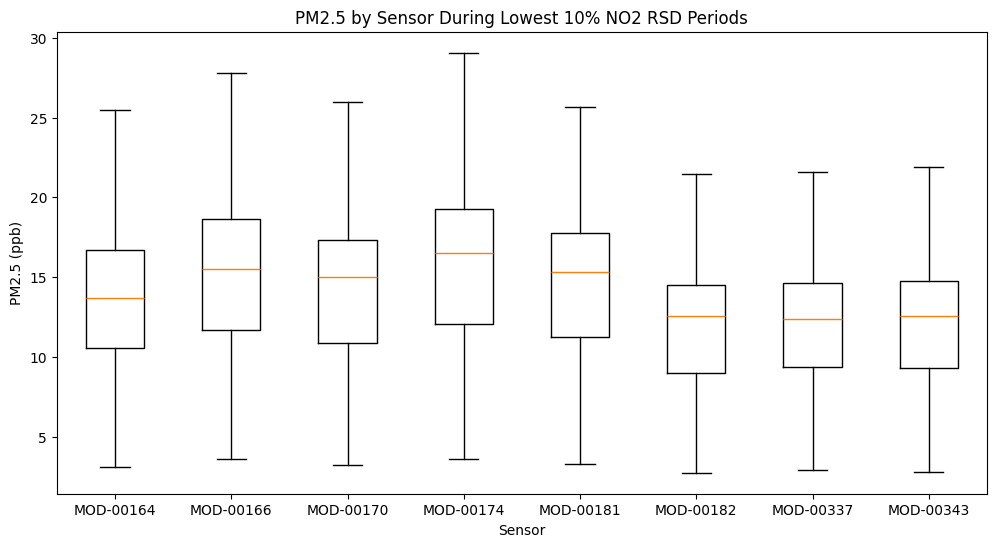

In [87]:
plt.figure(figsize=(12, 6))

data = [
    pm25_well_mixed[sensor].dropna()
    for sensor in pm25_well_mixed.columns
]

plt.boxplot(
    data,
    labels=pm25_well_mixed.columns,
    showfliers=True
)

plt.xlabel("Sensor")
plt.ylabel("PM2.5 (ppb)")
plt.title("PM2.5 by Sensor During Lowest 10% NO2 RSD Periods")

plt.show()


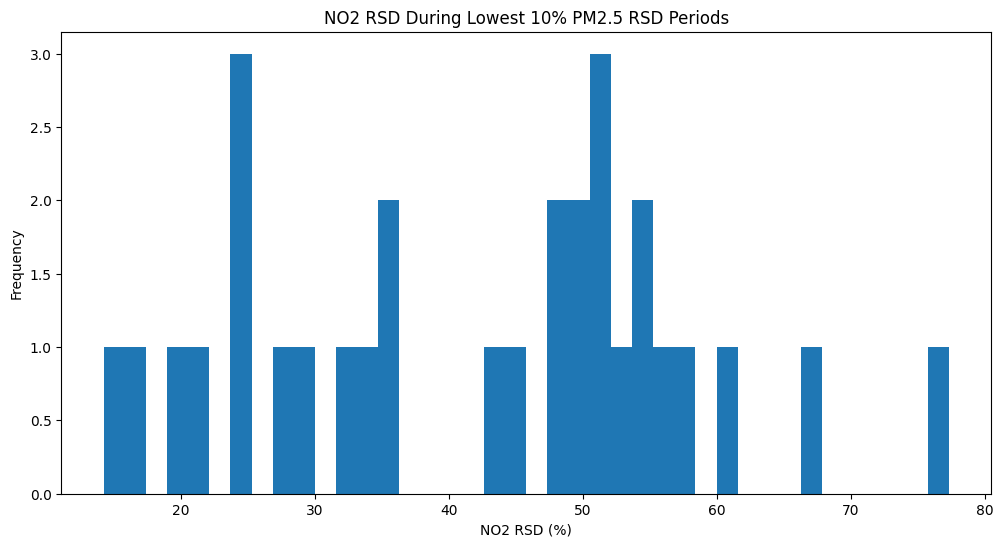

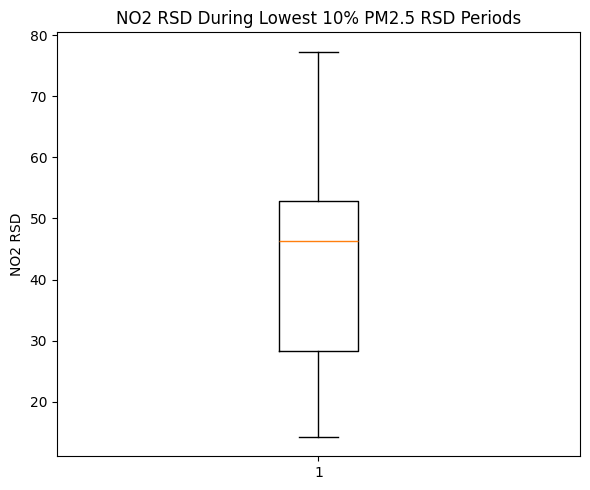

In [93]:
pm25_rsd = compute_rsd(pm25_df).dropna()
no2_rsd = compute_rsd(no2_df).dropna()

threshold = pm25_rsd.quantile(0.1)
well_mixed_times = pm25_rsd[pm25_rsd <= threshold].index
no2_rsd_filtered = no2_rsd.loc[well_mixed_times].dropna()


plt.figure(figsize=(12,6))

plt.hist(no2_rsd_filtered, bins=40)

plt.xlabel("NO2 RSD (%)")
plt.ylabel("Frequency")
plt.title("NO2 RSD During Lowest 10% PM2.5 RSD Periods")

plt.show()


plt.figure(figsize=(6,5))

plt.boxplot(no2_rsd_filtered, showfliers=True)

plt.ylabel("NO2 RSD")
plt.title("NO2 RSD During Lowest 10% PM2.5 RSD Periods")

plt.tight_layout()
plt.show()


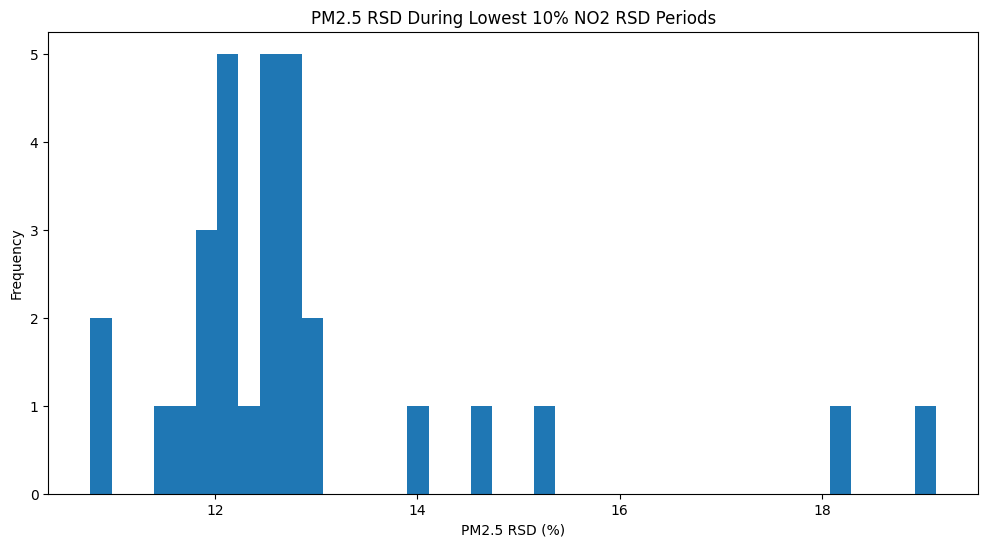

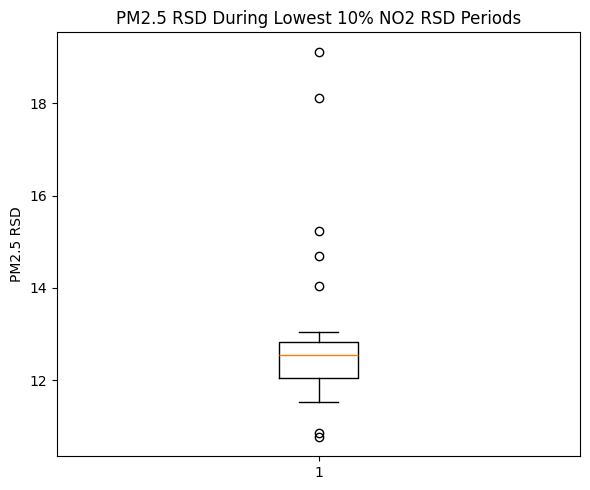

In [94]:
pm25_rsd = compute_rsd(pm25_df).dropna()
no2_rsd = compute_rsd(no2_df).dropna()

threshold = no2_rsd.quantile(0.1)
well_mixed_times = no2_rsd[no2_rsd <= threshold].index
pm25_rsd_filtered = pm25_rsd.loc[well_mixed_times].dropna()


plt.figure(figsize=(12,6))

plt.hist(pm25_rsd_filtered, bins=40)

plt.xlabel("PM2.5 RSD (%)")
plt.ylabel("Frequency")
plt.title("PM2.5 RSD During Lowest 10% NO2 RSD Periods")

plt.show()


plt.figure(figsize=(6,5))

plt.boxplot(pm25_rsd_filtered, showfliers=True)

plt.ylabel("PM2.5 RSD")
plt.title("PM2.5 RSD During Lowest 10% NO2 RSD Periods")

plt.tight_layout()
plt.show()
